# Load dataset Daily CHIRPS

## Load files

Three types of paths are established:
1) Path for daily CHIRPS datasets with resolution 0.05, data obtained from: https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p05/
2) Path for the daily data from IDEAM and Open Data for the Tunguavita station.
3) Path for the Shape that demarcates Boyacá.

In [1]:
import os
path = 'C:/Data/CHIRPS/daily/'
path_ideam = 'C:/Data/IDEAM/daily/'
path_shape = 'C:/Data/CHIRPS/shapes/'
files = os.listdir(path)

## Establish the geographic points of Boyacá

The limits of the geographic coordinates of the department of Boyacá are established.

In [2]:
import numpy as np

# Constants
LON_BOYACA_MIN = -74.8
LON_BOYACA_MAX = -71.9
LAT_BOYACA_MIN = 4.5
LAT_BOYACA_MAX = 7.3
RESOLUTION = 0.05

x = np.arange(LON_BOYACA_MIN, LON_BOYACA_MAX, RESOLUTION)
y = np.arange(LAT_BOYACA_MIN, LAT_BOYACA_MAX, RESOLUTION)

xx, yy = np.meshgrid(x, y)
xnorm = (xx - xx.min()) / (xx.max() - xx.min())
ynorm = (yy - yy.min()) / (yy.max() - yy.min())

## TUNGUAVITA - AUT [24035430] (5.74591667,-73.11636111)

Also for the Tunguavita station in Paipa - Boyacá, which would be a data point at 0.05 resolution.

In [3]:
# Constants
LON_BOYACA_TUNGUAVITA_MIN = -73.15
LON_BOYACA_TUNGUAVITA_MAX = -73.10
LAT_BOYACA_TUNGUAVITA_MIN = 5.70
LAT_BOYACA_TUNGUAVITA_MAX = 5.75

x_t = np.arange(LON_BOYACA_MIN, LON_BOYACA_MAX, 0.05)
y_t = np.arange(LAT_BOYACA_MIN, LAT_BOYACA_MAX, 0.05)

## Create dataset CHIRPS precipitation data

Loaded with libraries for data handling and geographic data formats: 
- netCDF4: This module can read and write files in both the new netCDF 4 and old netCDF 3 formats, and can create HDF5 client-readable files. Unlimited multiple dimensions, groups and data compression. More information at: https://unidata.github.io/netcdf4-python/
- xarray: A multidimensional array with labeled or named dimensions. DataArray objects add metadata such as dimension names, coordinates and attributes (defined below) to the underlying "unlabeled" data structures, such as numpy and Dask arrays. If its optional property name is set, it is a named DataArray. More information at: https://docs.xarray.dev/en/stable/user-guide/terminology.html
- pandas: pandas is a fast, powerful, flexible and easy-to-use open source data manipulation and analysis tool,
built on the Python programming language. More information at: https://pandas.pydata.org

The purpose of the following lines of code is to load the CHIRPS netCDF4 files for Boyacá and for the Tunguavita station.

In [4]:
import netCDF4 as nc
import xarray as xr
import pandas as pd
df_all = pd.DataFrame()
df_all_t = pd.DataFrame()
for file in files:
    if('nc' == file[-2:]):
        ds_chirps_nc = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+file)))
        # delimit the boundaries of Boyacá
        ds_boyaca = ds_chirps_nc.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
        ds_boyaca_t = ds_chirps_nc.sel(longitude=slice(LON_BOYACA_TUNGUAVITA_MIN,LON_BOYACA_TUNGUAVITA_MAX), latitude=slice(LAT_BOYACA_TUNGUAVITA_MIN,LAT_BOYACA_TUNGUAVITA_MAX))
        df_all = pd.concat([df_all,ds_boyaca.to_dataframe().reset_index()])
        df_all_t = pd.concat([df_all_t,ds_boyaca_t.to_dataframe().reset_index()])

In [5]:
ds_chirps_nc_2005 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2005.days_p05.nc')))
ds_chirps_nc_2006 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2006.days_p05.nc')))
ds_chirps_nc_2007 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2007.days_p05.nc')))
ds_chirps_nc_2008 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2008.days_p05.nc')))
ds_chirps_nc_2009 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2009.days_p05.nc')))
ds_chirps_nc_2010 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2010.days_p05.nc')))
ds_chirps_nc_2011 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2011.days_p05.nc')))
ds_chirps_nc_2012 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2012.days_p05.nc')))
ds_chirps_nc_2013 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2013.days_p05.nc')))
ds_chirps_nc_2014 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2014.days_p05.nc')))
ds_chirps_nc_2015 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2015.days_p05.nc')))
ds_chirps_nc_2016 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2016.days_p05.nc')))
ds_chirps_nc_2017 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2017.days_p05.nc')))
ds_chirps_nc_2018 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2018.days_p05.nc')))
ds_chirps_nc_2019 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2019.days_p05.nc')))
ds_chirps_nc_2020 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2020.days_p05.nc')))
ds_chirps_nc_2021 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path+'chirps-v2.0.2021.days_p05.nc')))

# delimit the boundaries of Boyacá
ds_chirps_nc_2005 = ds_chirps_nc_2005.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2006 = ds_chirps_nc_2006.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2007 = ds_chirps_nc_2007.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2008 = ds_chirps_nc_2008.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2009 = ds_chirps_nc_2009.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2010 = ds_chirps_nc_2010.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2011 = ds_chirps_nc_2011.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2012 = ds_chirps_nc_2012.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2013 = ds_chirps_nc_2013.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2014 = ds_chirps_nc_2014.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2015 = ds_chirps_nc_2015.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2016 = ds_chirps_nc_2016.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2017 = ds_chirps_nc_2017.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2018 = ds_chirps_nc_2018.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2019 = ds_chirps_nc_2019.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2020 = ds_chirps_nc_2020.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))
ds_chirps_nc_2021 = ds_chirps_nc_2021.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX))

After generating the datasets for each year with the respective coordinate coordinates for Boyacá, complete or concatenated datasets are created for the target study years, which in this case are from 2005 to 2021 and for comparison with IDEAM data from 2005 to 2007.

In [6]:
ds2005_2007 = xr.concat([ds_chirps_nc_2005,ds_chirps_nc_2006,ds_chirps_nc_2007], dim='time')
ds2005_2021 = xr.concat([ds_chirps_nc_2005,ds_chirps_nc_2006,ds_chirps_nc_2007,ds_chirps_nc_2008,ds_chirps_nc_2009,ds_chirps_nc_2010,ds_chirps_nc_2011,ds_chirps_nc_2012,ds_chirps_nc_2013,ds_chirps_nc_2014,ds_chirps_nc_2015,ds_chirps_nc_2016,ds_chirps_nc_2017,ds_chirps_nc_2018,ds_chirps_nc_2019,ds_chirps_nc_2020,ds_chirps_nc_2021], dim='time')

The 2007 dataset is grouped by months and the first month is chosen to plot precipitation.

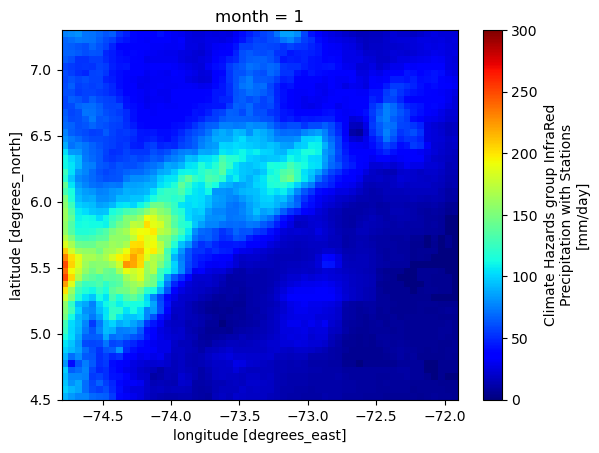

In [7]:
import matplotlib.pyplot as plt
ds_chirps_nc_2007_mon = ds_chirps_nc_2007.groupby('time.month').sum()
ds_chirps_nc_2007_mon.precip[0,:,:].plot(cmap='jet', vmax=300)

In [8]:
import calendar # We'll use this library to easily add month name to subplot titles.

In [9]:
# First, We will develop a land mask data array that we can use to mask out the nan values:
landmask = ds_chirps_nc_2007.precip.sum(dim='time')>0

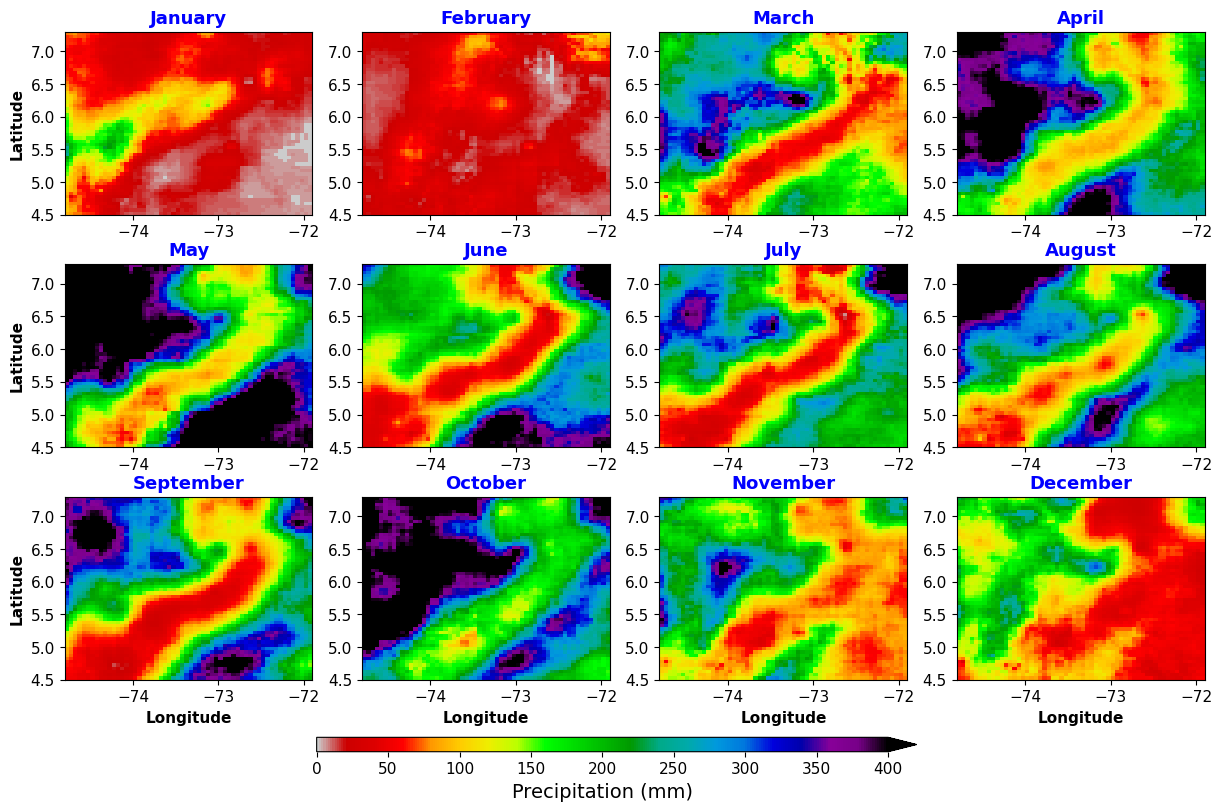

In [10]:
fig = plt.figure(figsize=[12,8], facecolor='w')
plt.subplots_adjust(bottom=0.15, top=0.96, left=0.04, right=0.99, 
                    wspace=0.2, hspace=0.27) # wspace and hspace adjust the horizontal and vertical spaces, respectively.
nrows = 3
ncols = 4
for i in range(1, 13):
    plt.subplot(nrows, ncols, i)
    dataplot = ds_chirps_nc_2007_mon.precip[i-1, :, :].where(landmask) # Remember that in Python, the data index starts at 0, but the subplot index start at 1.
    p = plt.pcolormesh(ds_chirps_nc_2007_mon.longitude, ds_chirps_nc_2007_mon.latitude, dataplot,
                   vmax = 400, vmin = 0, cmap = 'nipy_spectral_r',
                   ) 
    plt.xlim([LON_BOYACA_MIN,LON_BOYACA_MAX])
    plt.ylim([LAT_BOYACA_MIN,LAT_BOYACA_MAX])
    plt.title(calendar.month_name[dataplot.month.values], fontsize = 13, 
              fontweight = 'bold', color = 'b')
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 11)
    if i % ncols == 1: # Add ylabel for the very left subplots
        plt.ylabel('Latitude', fontsize = 11, fontweight = 'bold')
    if i > ncols*(nrows-1): # Add xlabel for the bottom row subplots
        plt.xlabel('Longitude', fontsize = 11, fontweight = 'bold')

# Add a colorbar at the bottom:
cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax=cax, orientation='horizontal', extend = 'max',)
cb.ax.tick_params(labelsize=11)
cb.set_label(label='Precipitation (mm)', color = 'k', size=14)

# Now we can save a high resolution (300dpi) version of the figure:
plt.savefig('Fig_prec_cpc_mon_2012.png', format = 'png', dpi = 300)

In [11]:
# load chirps precipitation data
chirps_2007 = ds_chirps_nc_2007

# select precipitation variable
pr = chirps_2007['precip']

# select boundaries (xmin, xmax, ymin and ymax) and time period of interest, which in this case will be the first day of the year 2007.
pr_boyaca = pr.sel(longitude=slice(LON_BOYACA_MIN,LON_BOYACA_MAX), latitude=slice(LAT_BOYACA_MIN,LAT_BOYACA_MAX),time=slice('2007-01-01','2007-01-01'))
v = pr_boyaca.to_numpy()

Precipitation data are located within the limits of a map of Boyacá with a file Shape generated with QGIS based on the geographic division of municipalities in Colombia, for this the GeoPandas library is used.
- GeoPandas: is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting. More information at: https://geopandas.org/en/stable/

In [12]:
import geopandas as gpd
# convert xarray to geopandas
df_boyaca = pr_boyaca.to_dataframe().reset_index()
gdf_precip = gpd.GeoDataFrame(df_boyaca.precip, geometry=gpd.points_from_xy(df_boyaca.longitude,df_boyaca.latitude))
gdf_boyaca = gpd.read_file(path_shape+'shape_boyaca.shp')#, crs="epsg:4326")

In [13]:
v = np.squeeze(v) #np 3-D to 2-D

(4.475, 7.27499999999999)

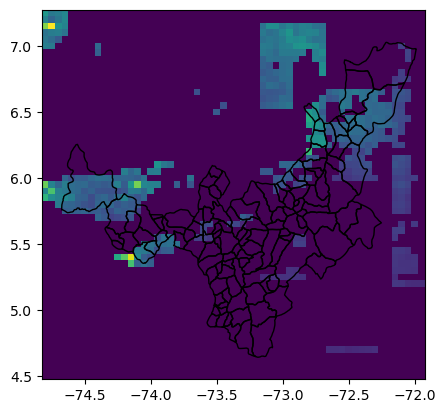

In [14]:
fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, v)
xlim, ylim = ax.get_xlim(), ax.get_ylim()
gdf_boyaca.plot(ax=ax, color='none', edgecolor='k')
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)

Luego para excluir la información fuera de los límites se usa la librería Shapely.

- Shapely: es un paquete Python con licencia BSD para la manipulación y análisis de objetos geométricos planos. Utiliza la biblioteca de geometría de código abierto GEOS (el motor de PostGIS y una adaptación de JTS). Shapely envuelve las geometrías y operaciones de GEOS para proporcionar tanto una interfaz Geometry rica en funciones para geometrías singulares (escalares) como ufuncs NumPy de mayor rendimiento para operaciones que utilizan matrices de geometrías. Más información en https://pypi.org/project/shapely/

(4.475, 7.27499999999999)

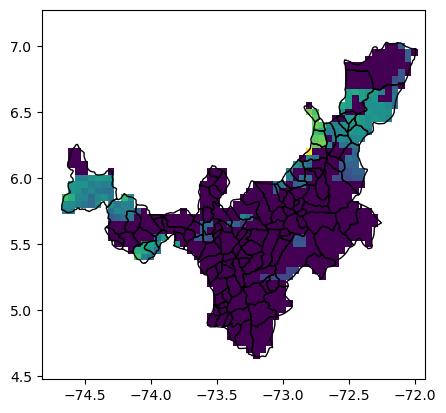

In [15]:
import shapely.vectorized
mask = shapely.vectorized.contains(gdf_boyaca.dissolve().geometry.item(), xx, yy)

fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, np.where(mask, v, np.nan))
xlim, ylim = ax.get_xlim(), ax.get_ylim()
gdf_boyaca.plot(ax=ax, color='none', edgecolor='k')
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)

# Treatment of outlayers

## Outlier Detection

In [16]:
df_all.describe()

,latitude,longitude,precip
count,2.184280e+07,2.184280e+07,2.184280e+07
mean,5.899998e+00,-7.335000e+01,5.982437e+00
std,8.081615e-01,8.370335e-01,1.025046e+01
min,4.524998e+00,-7.477500e+01,0.000000e+00
25%,5.212499e+00,-7.407500e+01,0.000000e+00
50%,5.900000e+00,-7.335001e+01,0.000000e+00
75%,6.587498e+00,-7.262501e+01,8.883957e+00
max,7.274998e+00,-7.192500e+01,2.776440e+02


In [17]:
df_all_t.describe()

,latitude,longitude,precip
count,6725.000000,6725.000000,6725.000000
mean,5.724998,-73.125008,2.570377
std,0.000000,0.000000,5.275625
min,5.724998,-73.125008,0.000000
25%,5.724998,-73.125008,0.000000
50%,5.724998,-73.125008,0.000000
75%,5.724998,-73.125008,3.459125
max,5.724998,-73.125008,83.350891


<Axes: >

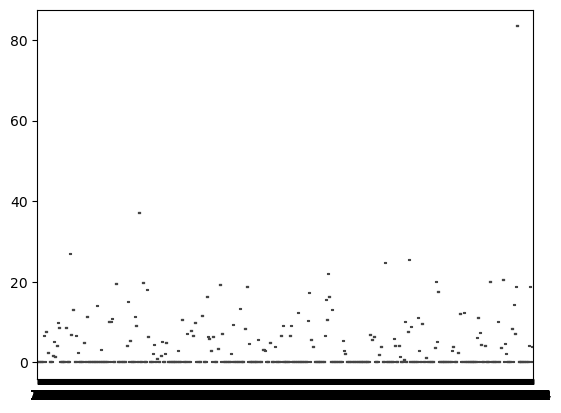

In [18]:
# Box Plot
import seaborn as sns
sns.boxplot(df_all_t['precip'])

## Nulls

In [19]:
import numpy as np
print(np.where((df_all['precip']>0.6)))

(array([       8,       13,       14, ..., 21842795, 21842796, 21842798],
      dtype=int64),)


In [20]:
df_all.isnull().sum()

latitude     0
longitude    0
time         0
precip       0
dtype: int64

## By years

The purpose of this study by years is to be able to see the continuity of the data together with the values, it will be done for: data of a single coordinate in this case Tunguavita of the daily dataset of CHIRPS, for the IDEAM data and for the Open Data data. 

The loading, processing and validation of IDEAM and Open Data data was performed in Google Colab: https://colab.research.google.com/drive/1QGaAZEjR--RnR1ASd00dPvcZE8-zTuTM?usp=sharing.

### CHIRPS

In [21]:
top = LAT_BOYACA_TUNGUAVITA_MAX
bottom = LAT_BOYACA_TUNGUAVITA_MIN
left = LON_BOYACA_TUNGUAVITA_MIN
right = LON_BOYACA_TUNGUAVITA_MAX

In [22]:
ds_sel = ds2005_2021.isel(longitude=(ds2005_2021.longitude >= left) & (ds2005_2021.longitude <= right),
                          latitude=(ds2005_2021.latitude >= bottom) & (ds2005_2021.latitude <= top),
                          )
ds_sel_avg = ds_sel.mean(dim=['latitude','longitude'])

Now let's plot the cumulative daily precipitation of the selected area for each year. To make things easier, let's drop Feb 29th from any leap years in the record. Here we go:

In [23]:
ds_sel_avg_noleap = ds_sel_avg.sel(time=~((ds_sel_avg.time.dt.month == 2) & (ds_sel_avg.time.dt.day == 29)))

In [24]:
# Here's how the result will look like:
ds_sel_avg_noleap

<xarray.Dataset>
Dimensions:  (time: 6205)
Coordinates:
  * time     (time) datetime64[ns] 2005-01-01 2005-01-02 ... 2021-12-31
Data variables:
    precip   (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 5.493 0.0 0.0 0.0 0.0

In [25]:
# Now we can easily save that output as a netcdf file using xarray:
ds_sel_avg_noleap.to_netcdf('C:/Data/CHIRPS/results/ds_prec_Boyaca_noleap_2005_2021.nc')

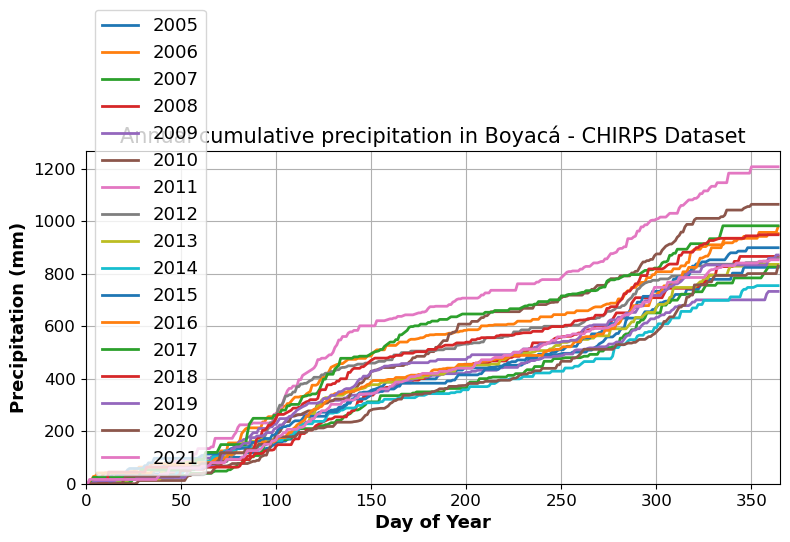

In [26]:
fig = plt.figure(figsize=[8,5], facecolor='w')
for yr in range(2005,2022):
    da_yr = ds_sel_avg_noleap.isel(time = ds_sel_avg_noleap.time.dt.year==yr).precip
    dataplot = da_yr.cumsum()
    plt.plot(dataplot, linewidth=2, label = yr)
plt.legend(fontsize=13)
plt.grid()
plt.xticks(fontsize=12) # we can also change the ticks to be on Jan-1, Feb-1, etc. but I'll skip it for here.
plt.yticks(fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize = 13, fontweight = 'bold')
plt.xlabel('Day of Year', fontsize = 13, fontweight = 'bold')
plt.xlim([0,365])
plt.ylim(bottom=0)
plt.title('Annual cumulative precipitation in Boyacá - CHIRPS Dataset', fontsize=15)
plt.tight_layout()
plt.savefig('Fig_cumsum_prec_Boyaca_CHIRPS.png', format = 'png', dpi = 300)

We could also do a little more modification to revise the xticklabels and show the exact month and day values (instead of julian day number). See if you can figure it out yourself.

### Load data IDEAM

In [27]:
ds_ideam_nc_2017_2021 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path_ideam+'IDEAM_2017_2021_PRECIP.nc')))

In [28]:
ds_ideam_nc_2017_2021

<xarray.Dataset>
Dimensions:    (time: 1024)
Coordinates:
  * time       (time) datetime64[ns] 2017-02-01 2017-02-02 ... 2021-07-31
Data variables:
    sun        (time) float64 ...
    temmin     (time) float64 ...
    temmax     (time) float64 ...
    humidity   (time) int64 ...
    precip     (time) float64 ...
    latitude   (time) float64 ...
    longitude  (time) float64 ...
Attributes:
    Conventions:  CF-1.6
    title:        Data IDEAM
    summary:      Data generated

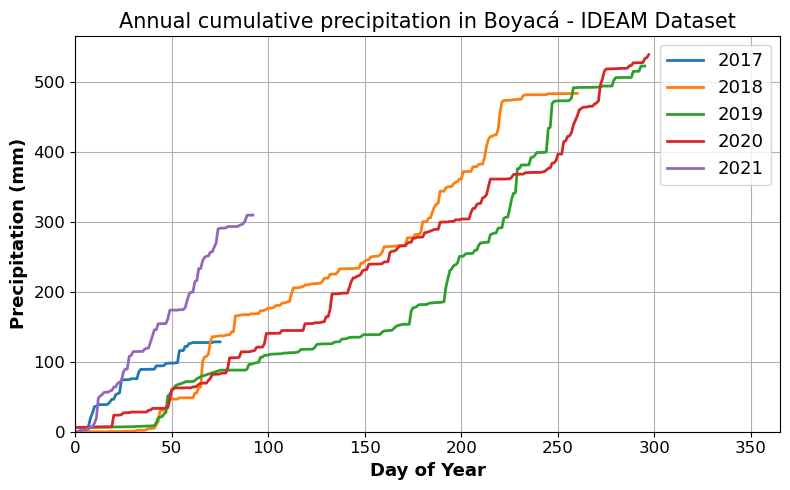

In [29]:
fig = plt.figure(figsize=[8,5], facecolor='w')
for yr in range(2017,2022):
    da_yr = ds_ideam_nc_2017_2021.isel(time = ds_ideam_nc_2017_2021.time.dt.year==yr).precip
    dataplot = da_yr.cumsum()
    plt.plot(dataplot, linewidth=2, label = yr)
plt.legend(fontsize=13)
plt.grid()
plt.xticks(fontsize=12) # we can also change the ticks to be on Jan-1, Feb-1, etc. but I'll skip it for here.
plt.yticks(fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize = 13, fontweight = 'bold')
plt.xlabel('Day of Year', fontsize = 13, fontweight = 'bold')
plt.xlim([0,365])
plt.ylim(bottom=0)
plt.title('Annual cumulative precipitation in Boyacá - IDEAM Dataset', fontsize=15)
plt.tight_layout()
plt.savefig('Fig_cumsum_prec_Boyaca_IDEAM.png', format = 'png', dpi = 300)

In [30]:
### Load data Datos Abiertos

In [31]:
ds_datos_abiertos_nc_2017_2021_PRECIP = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path_ideam+'DATOS_ABIERTOS_2017_2021_PRECIP.nc')))

In [32]:
ds_datos_abiertos_nc_2017_2021_PRECIP

<xarray.Dataset>
Dimensions:    (time: 1024)
Coordinates:
  * time       (time) datetime64[ns] 2017-02-01 2017-02-02 ... 2021-07-31
Data variables:
    sun        (time) float64 ...
    temmin     (time) float64 ...
    temmax     (time) float64 ...
    humidity   (time) int64 ...
    precip     (time) float64 ...
    latitude   (time) float64 ...
    longitude  (time) float64 ...
Attributes:
    Conventions:  CF-1.6
    title:        Data IDEAM
    summary:      Data generated

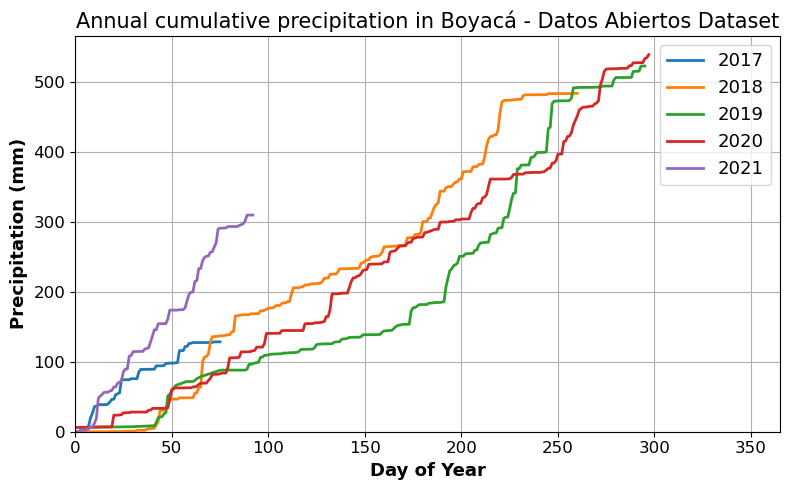

In [33]:
fig = plt.figure(figsize=[8,5], facecolor='w')
# One more year is required, but in reality the data is up to 2021.
for yr in range(2017,2022):
    da_yr = ds_datos_abiertos_nc_2017_2021_PRECIP.isel(time = ds_datos_abiertos_nc_2017_2021_PRECIP.time.dt.year==yr).precip
    dataplot = da_yr.cumsum()
    plt.plot(dataplot, linewidth=2, label = yr)
plt.legend(fontsize=13)
plt.grid()
plt.xticks(fontsize=12) # we can also change the ticks to be on Jan-1, Feb-1, etc. but I'll skip it for here.
plt.yticks(fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize = 13, fontweight = 'bold')
plt.xlabel('Day of Year', fontsize = 13, fontweight = 'bold')
plt.xlim([0,365])
plt.ylim(bottom=0)
plt.title('Annual cumulative precipitation in Boyacá - Datos Abiertos Dataset', fontsize=15)
plt.tight_layout()
plt.savefig('Fig_cumsum_prec_Boyaca_DATOS_ABIERTOS.png', format = 'png', dpi = 300)

### Load data IDEAM generated with additional variables such as; sun, temmin, temmax and humidity

In [34]:
ds_ideam_nc_2017_2021 = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(path_ideam+'IDEAM_2017_2021.nc')))

In [35]:
ds_ideam_nc_2017_2021

<xarray.Dataset>
Dimensions:    (time: 1024)
Coordinates:
  * time       (time) datetime64[ns] 2017-02-01 2017-02-02 ... 2021-07-31
Data variables:
    sun        (time) float64 ...
    temmin     (time) float64 ...
    temmax     (time) float64 ...
    humidity   (time) int64 ...
    precip     (time) float64 ...
    latitude   (time) float64 ...
    longitude  (time) float64 ...
Attributes:
    Conventions:  CF-1.6
    title:        Data IDEAM
    summary:      Data generated

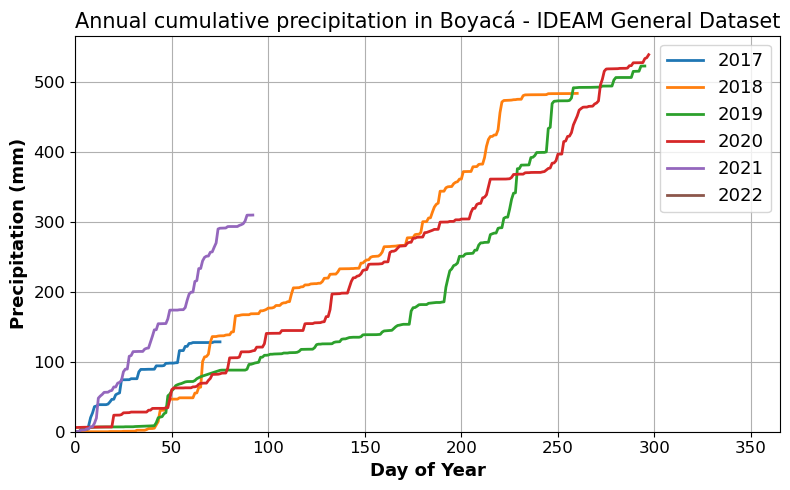

In [36]:
fig = plt.figure(figsize=[8,5], facecolor='w')
for yr in range(2017,2023):
    da_yr = ds_ideam_nc_2017_2021.isel(time = ds_ideam_nc_2017_2021.time.dt.year==yr).precip
    dataplot = da_yr.cumsum()
    plt.plot(dataplot, linewidth=2, label = yr)
plt.legend(fontsize=13)
plt.grid()
plt.xticks(fontsize=12) # we can also change the ticks to be on Jan-1, Feb-1, etc. but I'll skip it for here.
plt.yticks(fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize = 13, fontweight = 'bold')
plt.xlabel('Day of Year', fontsize = 13, fontweight = 'bold')
plt.xlim([0,365])
plt.ylim(bottom=0)
plt.title('Annual cumulative precipitation in Boyacá - IDEAM General Dataset', fontsize=15)
plt.tight_layout()
plt.savefig('Fig_cumsum_prec_Boyaca_IDEAM_general.png', format = 'png', dpi = 300)